In [5]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

df = pd.read_csv("C:/Users/lenovo/Downloads/Train.csv")

In [6]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<AxesSubplot:>

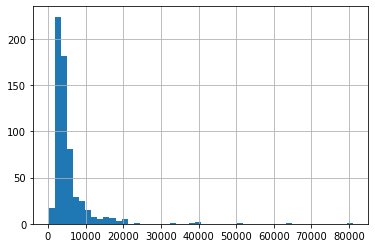

In [9]:
df['ApplicantIncome'].hist(bins=50)

<AxesSubplot:>

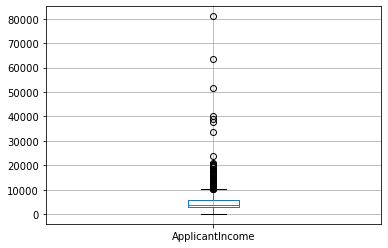

In [10]:
df.boxplot(column='ApplicantIncome')

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

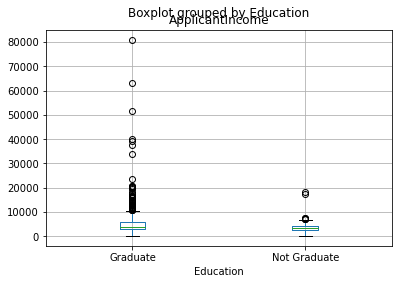

In [11]:
df.boxplot(column='ApplicantIncome', by = 'Education')

<AxesSubplot:>

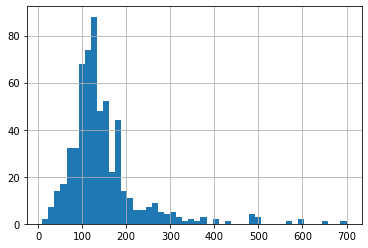

In [12]:
df['LoanAmount'].hist(bins=50)

<AxesSubplot:>

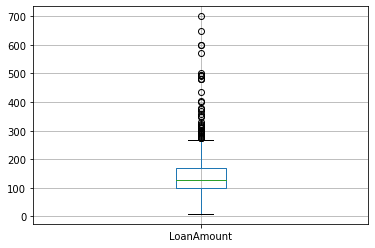

In [13]:
df.boxplot(column='LoanAmount')

In [14]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (temp1)

print ('\nProbility of getting loan for each Credit History class:')
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Text(0.5, 1.0, 'Probability of getting loan by credit history')

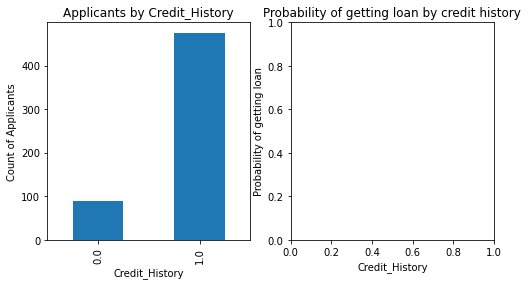

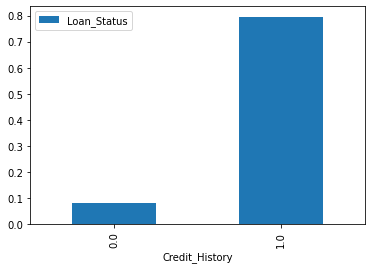

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

<AxesSubplot:xlabel='Credit_History'>

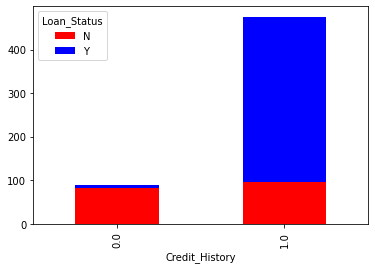

In [16]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [17]:
 df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
 df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [19]:
 df['Self_Employed'].fillna('No',inplace=True)

This method will not work as we have filled in null value using previous method

In [26]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
    a = x['Self_Employed']
    b = x['Education']
    return table.loc[a,b]
# Replace missing values
a = df['LoanAmount']
a.fillna(df[a.isnull()].apply(fage, axis=1), inplace=True)




KeyError: 'Self_Employed'

<AxesSubplot:>

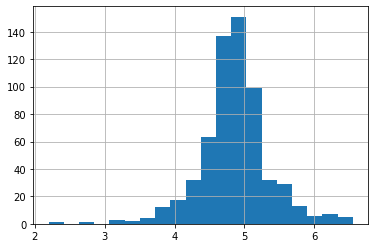

In [27]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

<AxesSubplot:>

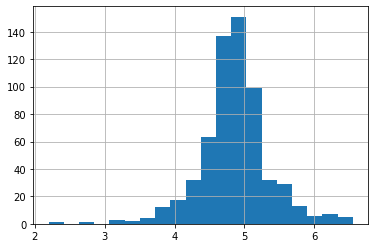

In [28]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20) 

In [29]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [30]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [57]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [80]:
def classification_model(model, data, predictors, outcome):
    model.fit(data[predictors],data[outcome])
    predictions = model.predict(data[predictors])
    
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
    
    kf = KFold(5,True)
    error = []
    
    for train, test in kf:
        train_predictors = (data[predictors].iloc[train,:])
        train_target = data[outcome].iloc[train]
        model.fit(train_predictors, train_target)
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
        
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    model.fit(data[predictors],data[outcome])

In [81]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%


E:\anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


TypeError: 'KFold' object is not iterable

In [72]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%


E:\anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True, random_state=614 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


TypeError: 'KFold' object is not iterable

In [73]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%


E:\anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True, random_state=614 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


TypeError: 'KFold' object is not iterable

In [74]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 89.414%


E:\anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True, random_state=614 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


TypeError: 'KFold' object is not iterable

In [75]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%


E:\anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True, random_state=614 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


TypeError: 'KFold' object is not iterable

In [76]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Credit_History      0.274074
TotalIncome_log     0.270716
LoanAmount_log      0.222960
Dependents          0.054313
Property_Area       0.047009
Loan_Amount_Term    0.039319
Married             0.026113
Education           0.022687
Self_Employed       0.022062
Gender              0.020747
dtype: float64


In [77]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 82.573%


E:\anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True, random_state=614 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


TypeError: 'KFold' object is not iterable

In [82]:
sum(df['Cabin'].isnull()) 

KeyError: 'Cabin'

In [83]:
#load the library and check its version, just to make sure we aren't using an older version
import numpy as np
np.__version__
'1.12.1'

'1.12.1'

In [86]:
#create a list comprising numbers from 0 to 9
L = list(range(10))
#converting integers to string - this style of handling lists is known as list comprehension.
#List comprehension offers a versatile way to handle list manipulations tasks easily. We'll learn about them in future tutorials. Here's an example.  

[str(c) for c in L]
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

[type(item) for item in L]
[int, int, int, int, int, int, int, int, int, int]

[int, int, int, int, int, int, int, int, int, int]

below sell tells us that nmpy have datatypes like float int etc

In [91]:
#creating arrays
print(np.zeros(10, dtype='int'))


#creating a 3 row x 5 column matrix
print(np.ones((3,5), dtype=float))

#creating a matrix with a predefined value
print(np.full((3,5),1.23))



#create an array with a set sequence
print(np.arange(0, 20, 2))



#create an array of even space between the given range of values
print(np.linspace(0, 1, 5))



#create a 3x3 array with mean 0 and standard deviation 1 in a given dimension
print(np.random.normal(0, 1, (3,3)))


#create an identity matrix
print(np.eye(3))


#set a random seed
print(np.random.seed(0))


x1 = np.random.randint(10, size=6) #one dimension
x2 = np.random.randint(10, size=(3,4)) #two dimension
x3 = np.random.randint(10, size=(3,4,5)) #three dimension


print("x3 ndim:", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)
('x3 ndim:', 3)
('x3 shape:', (3, 4, 5))
('x3 size: ', 60)

[0 0 0 0 0 0 0 0 0 0]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[1.23 1.23 1.23 1.23 1.23]
 [1.23 1.23 1.23 1.23 1.23]
 [1.23 1.23 1.23 1.23 1.23]]
[ 0  2  4  6  8 10 12 14 16 18]
[0.   0.25 0.5  0.75 1.  ]
[[ 1.25441407  1.41910204 -0.74385608]
 [-2.5174371  -1.50709602  1.14907613]
 [-1.19357825  1.14104245  1.50944508]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
None
x3 ndim: 3
x3 shape: (3, 4, 5)
x3 size:  60


('x3 size: ', 60)

a demonstration regarding indexing of array

In [95]:
x1 = np.array([4, 3, 4, 4, 8, 4])
print(x1)
print(x1[0])
print(x1[4])
print(x1[-1])
print(x1[-2])

print(x2)
print(x2[2,3])
print(x2[2,-1])
x2[0,0] = 12
print(x2)

[4 3 4 4 8 4]
4
8
4
8
[[12  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]
7
7
[[12  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


A demostration regarding slicing of arrays

In [96]:
x = np.arange(10)
print(x)


#from start to 4th position
print(x[:5])



#from 4th position to end
print(x[4:])



#from 4th to 6th position
print(x[4:7])



#return elements at even place
print(x[ : : 2])



#return elements from first position step by two
print(x[1::2])



#reverse the array
print(x[::-1])


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4]
[4 5 6 7 8 9]
[4 5 6]
[0 2 4 6 8]
[1 3 5 7 9]
[9 8 7 6 5 4 3 2 1 0]


A demonstration regarding array concatination

In [98]:
#You can concatenate two or more arrays at once.
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
z = [21,21,21]
print(np.concatenate([x, y,z]))



#You can also use this function to create 2-dimensional arrays.
grid = np.array([[1,2,3],[4,5,6]])
print(np.concatenate([grid,grid]))


#Using its axis parameter, you can define row-wise or column-wise matrix
np.concatenate([grid,grid],axis=1)


[ 1  2  3  3  2  1 21 21 21]
[[1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]]


array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [99]:
import pandas as pd
#create a data frame - dictionary is used here where keys get converted to column names and values to row values.
data = pd.DataFrame({'Country': ['Russia','Colombia','Chile','Equador','Nigeria'],
                    'Rank':[121,40,100,130,11]})
data

,Country,Rank
0,Russia,121
1,Colombia,40
2,Chile,100
3,Equador,130
4,Nigeria,11


In [100]:
data.describe()

,Rank
count,5.000000
mean,80.400000
std,52.300096
min,11.000000
25%,40.000000
50%,100.000000
75%,121.000000
max,130.000000


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  5 non-null      object
 1   Rank     5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [102]:
data= pd.DataFrame({'group':['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],'ounces':[4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


In [103]:
data.sort_values(by=['ounces'],ascending=True,inplace=False)

,group,ounces
1,a,3.0
6,c,3.0
0,a,4.0
7,c,5.0
3,b,6.0
8,c,6.0
4,b,7.5
5,b,8.0
2,a,12.0


In [104]:
data.sort_values(by=['group','ounces'],ascending=[True,False],inplace=False)


,group,ounces
2,a,12.0
0,a,4.0
1,a,3.0
5,b,8.0
4,b,7.5
3,b,6.0
8,c,6.0
7,c,5.0
6,c,3.0


In [105]:
data = pd.DataFrame({'k1':['one']*3 + ['two']*4, 'k2':[3,2,1,3,3,4,4]})
data

,k1,k2
0,one,3
1,one,2
2,one,1
3,two,3
4,two,3
5,two,4
6,two,4


In [106]:
data.sort_values(by='k2')

,k1,k2
2,one,1
1,one,2
0,one,3
3,two,3
4,two,3
5,two,4
6,two,4


In [107]:
data.drop_duplicates()

,k1,k2
0,one,3
1,one,2
2,one,1
3,two,3
5,two,4


In [108]:
data.drop_duplicates(subset='k1')

,k1,k2
0,one,3
3,two,3


In [109]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami','corned beef', 'Bacon', 'pastrami', 'honey ham','nova lox'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [110]:
meat_to_animal = {
'bacon': 'pig',
'pulled pork': 'pig',
'pastrami': 'cow',
'corned beef': 'cow',
'honey ham': 'pig',
'nova lox': 'salmon'
}

def meat_2_animal(series):
    if series['food'] == 'bacon':
        return 'pig'
    elif series['food'] == 'pulled pork':
        return 'pig'
    elif series['food'] == 'pastrami':
        return 'cow'
    elif series['food'] == 'corned beef':
        return 'cow'
    elif series['food'] == 'honey ham':
        return 'pig'
    else:
        return 'salmon'


#create a new variable
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [113]:
lower = lambda x: x.lower()
data['food'] = data['food'].apply(lower)
data['animal2'] = data.apply(meat_2_animal, axis='columns')
data

,food,ounces,animal,animal2
0,bacon,4.0,pig,pig
1,pulled pork,3.0,pig,pig
2,bacon,12.0,pig,pig
3,pastrami,6.0,cow,cow
4,corned beef,7.5,cow,cow
5,bacon,8.0,pig,pig
6,pastrami,3.0,cow,cow
7,honey ham,5.0,pig,pig
8,nova lox,6.0,salmon,salmon


In [114]:
data.assign(new_variable = data['ounces']*10)

,food,ounces,animal,animal2,new_variable
0,bacon,4.0,pig,pig,40.0
1,pulled pork,3.0,pig,pig,30.0
2,bacon,12.0,pig,pig,120.0
3,pastrami,6.0,cow,cow,60.0
4,corned beef,7.5,cow,cow,75.0
5,bacon,8.0,pig,pig,80.0
6,pastrami,3.0,cow,cow,30.0
7,honey ham,5.0,pig,pig,50.0
8,nova lox,6.0,salmon,salmon,60.0


In [115]:
data.drop('animal2',axis='columns',inplace=True)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,pastrami,6.0,cow
4,corned beef,7.5,cow
5,bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [116]:
data.assign(new_variable = data['ounces']*10)

,food,ounces,animal,new_variable
0,bacon,4.0,pig,40.0
1,pulled pork,3.0,pig,30.0
2,bacon,12.0,pig,120.0
3,pastrami,6.0,cow,60.0
4,corned beef,7.5,cow,75.0
5,bacon,8.0,pig,80.0
6,pastrami,3.0,cow,30.0
7,honey ham,5.0,pig,50.0
8,nova lox,6.0,salmon,60.0


In [118]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),index=['Ohio', 'Colorado', 'New York'],columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [119]:
data.rename(index = {'Ohio':'SanF'}, columns={'one':'one_p','two':'two_p'},inplace=True)
data

,one_p,two_p,three,four
SanF,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [120]:
#You can also use string functions
data.rename(index = str.upper, columns=str.title,inplace=True)
data

,One_P,Two_P,Three,Four
SANF,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [121]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [123]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df


,key1,key2,data1,data2
0,a,one,1.254414,1.149076
1,a,two,1.419102,-1.193578
2,b,one,-0.743856,1.141042
3,b,two,-2.517437,1.509445
4,a,one,-1.507096,1.067775


In [126]:
grouped = df['data1'].groupby(df['key1'])
grouped.mean()


key1
a    0.388807
b   -1.630647
Name: data1, dtype: float64

In [127]:
dates = pd.date_range('20130101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.686589,0.014873,-0.375666,-0.038224
2013-01-02,0.367974,-0.044724,-0.302375,-2.224404
2013-01-03,0.724006,0.359003,1.076121,0.192141
2013-01-04,0.852926,0.018357,0.428304,0.996278
2013-01-05,-0.491150,0.712678,1.113340,-2.153675
2013-01-06,-0.416111,-1.070897,0.221139,-1.123057


In [128]:
df[:3]

,A,B,C,D
2013-01-01,-0.686589,0.014873,-0.375666,-0.038224
2013-01-02,0.367974,-0.044724,-0.302375,-2.224404
2013-01-03,0.724006,0.359003,1.076121,0.192141


In [129]:
df['20130101':'20130104']

,A,B,C,D
2013-01-01,-0.686589,0.014873,-0.375666,-0.038224
2013-01-02,0.367974,-0.044724,-0.302375,-2.224404
2013-01-03,0.724006,0.359003,1.076121,0.192141
2013-01-04,0.852926,0.018357,0.428304,0.996278


In [130]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.686589,0.014873
2013-01-02,0.367974,-0.044724
2013-01-03,0.724006,0.359003
2013-01-04,0.852926,0.018357
2013-01-05,-0.491150,0.712678
2013-01-06,-0.416111,-1.070897


In [131]:
df.iloc[3] #returns 4th row (index is 3rd)

A    0.852926
B    0.018357
C    0.428304
D    0.996278
Name: 2013-01-04 00:00:00, dtype: float64

In [132]:
df.iloc[2:4, 0:2]

,A,B
2013-01-03,0.724006,0.359003
2013-01-04,0.852926,0.018357


In [133]:
df2 = df.copy()
df2['E']=['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,-0.686589,0.014873,-0.375666,-0.038224,one
2013-01-02,0.367974,-0.044724,-0.302375,-2.224404,one
2013-01-03,0.724006,0.359003,1.076121,0.192141,two
2013-01-04,0.852926,0.018357,0.428304,0.996278,three
2013-01-05,-0.491150,0.712678,1.113340,-2.153675,four
2013-01-06,-0.416111,-1.070897,0.221139,-1.123057,three


In [134]:
df.query('A < B | C > A')

,A,B,C,D
2013-01-01,-0.686589,0.014873,-0.375666,-0.038224
2013-01-03,0.724006,0.359003,1.076121,0.192141
2013-01-05,-0.491150,0.712678,1.113340,-2.153675
2013-01-06,-0.416111,-1.070897,0.221139,-1.123057


In [135]:
data = pd.DataFrame({'group': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


In [137]:
data.pivot_table(values='ounces',index='group',aggfunc=np.mean)


,ounces
group,
a,6.333333
b,7.166667
c,4.666667


In [138]:
data.pivot_table(values='ounces',index='group',aggfunc='count')

,ounces
group,
a,3
b,3
c,3
